# Import

In [1]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


2.7.0


In [2]:
#load data. labels are in one-hot-encoding format
#generate original training and test data
img_size = 28
n_classes = 10

#global_step = 
input_size = 784
output_size = 10

print('\nLoading MNIST')

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, [-1, img_size*img_size])
x_train = x_train.astype(np.float32)/255

print(x_train.shape)

x_test = np.reshape(x_test, [-1, img_size*img_size])
x_test = x_test.astype(np.float32)/255

print(x_test.shape)

to_categorical = tf.keras.utils.to_categorical 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('\nSpliting data')

ind = np.random.permutation(x_train.shape[0])
x_train, y_train = x_train[ind], y_train[ind]

# 10% for validation 
validatationPct = 0.1
n = int(x_train.shape[0] * (1-validatationPct))
x_valid = x_train[n:]
x_train = x_train[:n]
#
y_valid = y_train[n:]
y_train = y_train[:n]

train_num_examples = x_train.shape[0]
valid_num_examples = x_valid.shape[0]
test_num_examples  = x_test.shape[0]

print(train_num_examples, valid_num_examples, test_num_examples)


Loading MNIST
(60000, 784)
(10000, 784)

Spliting data
54000 6000 10000


# Load image

In [3]:

index = 1058

img = x_train[index]
label = y_train[index]

print('Label:', np.argmax(label))

Label: 2


# Plot with shape 28x28

Shape before: (784,)
Shape after: (28, 28)


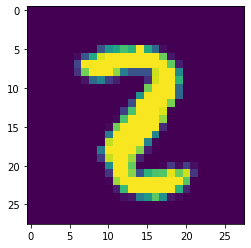

In [4]:

print('Shape before:', img.shape)
img = img.reshape( 28, 28)
#the image are stored as vector, need to convert in matrix in order to visualize it
print('Shape after:',img.shape)
plt.imshow(img)
plt.show()

# Max Pooling

New Shape: (14, 14)


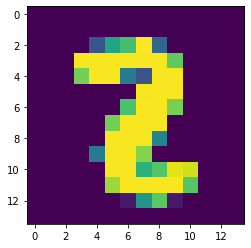

In [5]:
p_max = tf.nn.pool(input=img.reshape(1, 28,28,1), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2],
    pooling_type="MAX",
    padding="VALID",
    strides=[2,2])

#remove the first and last dimension added by the reshape
p_max = tf.squeeze(p_max, [0, 3])
print('New Shape:', p_max.shape)


'''
# depends on Tensorflow version, you would not need session anymore
#define a session
sess = tf.Session()
# Use sess.run() to print the img from the tensor
#plt.imshow(sess.run(p_max))
'''


plt.imshow(p_max)

# Average Pooling

New Shape: (14, 14)


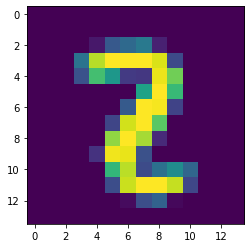

In [6]:
p_avg = tf.nn.pool(input=img.reshape(1,28,28,1), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2],
    pooling_type="AVG",
    padding="SAME", 
    strides=[2,2])

#remove the first and last dimension added by the reshape
p_avg = tf.squeeze(p_avg, [0, 3])
print('New Shape:', p_avg.shape)

plt.imshow(p_avg)